In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px

In [26]:
restaurant = pd.read_csv('C:/Users/julih/OneDrive/Documents/KecerdasanBuatan/zomato.csv', encoding = 'latin1')
restaurant.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [19]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality Verbose      9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [20]:
# Nulls and Duplicates

# Cuisiones column contains null value
restaurant['Cuisines'] = restaurant['Cuisines'].fillna('unknown')

print(f'{restaurant.isna().sum().sum()} null values left')
print(f'{restaurant.duplicated().sum()} duplicates found')

0 null values left
0 duplicates found


In [31]:
# Pupular Restaurants

top_restaurant = restaurant[['Restaurant Name', 'Votes']]
top_restaurant = top_restaurant.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending =False).head(10)
top_restaurant = top_restaurant.reset_index()

# Extract specific restaurants and price 
restaurant_price = restaurant[restaurant['Restaurant Name'].isin(categories)][['Restaurant Name','Average Cost for two']]

# ave_price for each of them.
avg_price = round(restrant_price.groupby('Restaurant Name')['Average Cost for two'].mean(),2).reset_index()

# Keep them in same order as votes volumns.
avg_price['Restaurant Name'] = pd.Categorical(avg_price['Restaurant Name'], categories=categories, ordered=True)
avg_price = avg_price.sort_values('Restaurant Name')
cost_per_person = avg_price['Average Cost for two']/2

# Convert to US dollar
top_restaurant['Cost per customer in USD'] = round(cost_per_person/13.72,2)

top_restaurant

,Restaurant Name,Votes,Cost per customer in USD
0,Barbeque Nation,28142,NaN
1,AB's - Absolute Barbecues,13400,NaN
2,Toit,10934,NaN
3,Big Chill,10853,NaN
4,Farzi Cafe,10098,NaN
5,Truffles,9682,NaN
6,Chili's,8156,NaN
7,Hauz Khas Social,7931,NaN
8,Joey's Pizza,7807,NaN
9,Peter Cat,7574,NaN


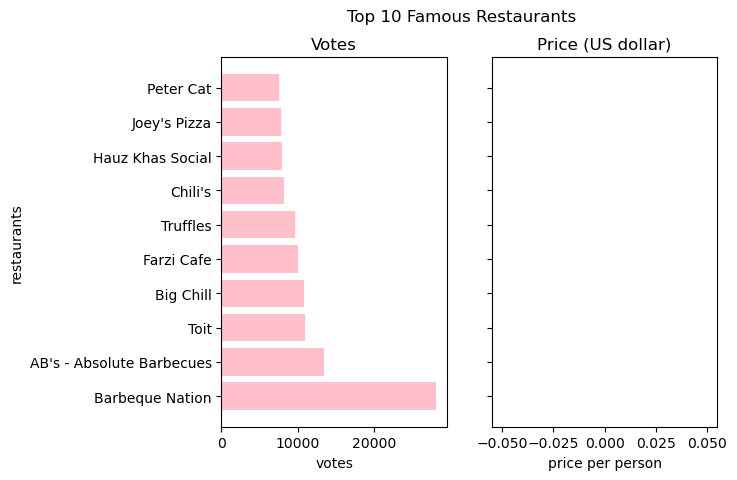

In [22]:
#Visualization
restaurants = top_restaurant['Restaurant Name']
votes = top_restaurant['Votes']
price = top_restaurant['Cost per customer in USD']

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.barh(restaurants, votes, color = 'pink')
ax1.set_title('Votes')
ax1.set_xlabel('votes')
ax1.set_ylabel('restaurants')

ax2.barh(restaurants, price, color = 'skyblue')
ax2.set_title('Price (US dollar)')
ax2.set_xlabel('price per person')

plt.suptitle("Top 10 Famous Restaurants")
plt.show()

Text(0, 0.5, 'Counts of Restaurants')

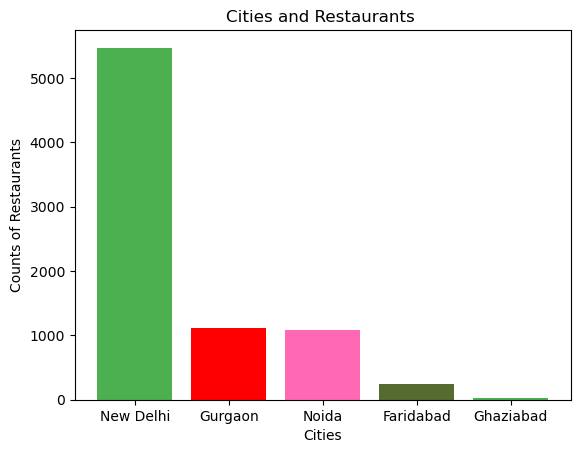

In [29]:
# Barbeque Nation is the most popular restaurant in India
# Locations

city_counts = restaurant.groupby('City').size().sort_values(ascending = False).head(5)
city_counts = city_counts.reset_index()
city_counts.columns = ['city','res_count']


# Visualization
plt.bar(city_counts['city'],city_counts['res_count'], color = ["#4CAF50","red","hotpink","#556B2F"])

plt.title("Cities and Restaurants ")
plt.xlabel('Cities')
plt.ylabel('Counts of Restaurants')